In [1]:
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
df = pd.read_csv("combined_df.csv", index_col=0)
df[["medianAlt", "medianSpeed", "medianResDist", "csm_1", "csm_2"]] = df[["medianAlt", "medianSpeed", "medianResDist", "csm_1", "csm_2"]].fillna(-1)
df["csm"] = df["csm_2"].apply(lambda v: -1 if v == -1 else 0 if v < 0.25 else 1)
df.describe()

,potential_bolide_id,potential_bolide_longitude,potential_bolide_latitude,confidence_x,confidence_y,_id,yaw_flip_flag,maxEnergy,totEnergy,nGroups,duration,latLonLinelets,energyRatio,splinelets,groundTrackDeviation,chop,glint,neighborhood,latLonLinearity,medianAlt_g16,medianSpeed_g16,medianResDist_g16,medianAlt_g17,medianSpeed_g17,medianResDist_g17,phase,moon_fullness,solarhour,sun_alt_obs,sun_alt_app,csm_1,csm_2,csm_1_17,csm_2_17,csm_2_16,csm_1_16,medianAlt,medianSpeed,medianResDist,csm
count,1.046200e+04,10462.000000,10462.000000,10462.000000,10462.000000,1.046200e+04,10462.000000,1.046200e+04,1.046200e+04,10462.000000,10462.000000,1.046200e+04,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,3211.000000,3155.000000,3211.000000,3211.000000,3155.000000,3211.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,6244.000000,6499.000000,7219.000000,6906.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,1.670407e+18,-87.148347,3.601100,0.625546,0.625546,1.670407e+18,0.591092,6.264099e+00,5.888253e+02,80.812369,0.231162,4.891630e+00,0.527657,0.002362,0.852568,0.012114,5511.177680,2.082681,0.742186,58.080970,65.286836,5.532964,58.080471,67.558957,5.532964,0.488264,0.499358,9.286280,7.392259,7.328547,0.377022,0.369244,0.736064,0.722009,0.671229,0.685639,17.133071,19.332560,1.005099,0.550946
std,5.000122e+16,73.344535,25.120392,0.306245,0.306245,5.000122e+16,0.912619,6.407166e+02,6.022736e+04,178.726562,0.456445,4.778883e+02,0.180490,0.003501,33.950905,0.018633,3152.547260,91.983063,0.260694,32.557276,231.374621,32.207530,32.557939,237.012072,32.207530,0.288409,0.287409,5.756323,41.233293,41.237418,0.724817,0.706302,0.295533,0.269117,0.287680,0.318352,32.677854,117.118216,18.093840,0.792877
min,1.620192e+18,-179.999374,-56.537132,0.200069,0.200069,1.620192e+18,0.000000,1.285030e-15,2.218620e-14,20.000000,0.022126,2.555835e-14,0.000000,0.000000,0.000432,0.000000,4.593179,0.000000,0.005218,9.167527,0.056485,0.006051,9.173078,0.000000,0.006051,0.000019,0.000003,0.001867,-88.451701,-88.451701,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.620210e+18,-128.302391,-15.850136,0.298573,0.298573,1.620210e+18,0.000000,5.584514e-15,1.407766e-13,26.000000,0.069428,7.570421e-11,0.438458,0.000539,0.005727,0.000000,3392.679474,0.000000,0.548289,15.775042,0.624227,1.594395,15.774445,0.672190,1.594395,0.237668,0.244627,5.020162,-25.131102,-25.131102,0.148147,0.225339,0.544748,0.542497,0.463430,0.453355,-1.000000,-1.000000,-1.000000,0.000000
50%,1.720192e+18,-99.512493,5.634765,0.663504,0.663504,1.720192e+18,0.000000,1.098387e-14,3.033284e-13,39.000000,0.123216,2.382963e-10,0.534224,0.001320,0.008247,0.000000,5170.720946,0.000000,0.801423,77.382745,8.145276,3.172864,77.382513,20.754300,3.172864,0.481271,0.495826,8.177124,9.671023,9.581787,0.673771,0.647313,0.862540,0.804092,0.738883,0.795939,-1.000000,-1.000000,-1.000000,1.000000
75%,1.720203e+18,-63.486264,22.711296,0.952000,0.952000,1.720203e+18,2.000000,2.508217e-14,7.789268e-13,72.000000,0.236515,7.406727e-10,0.630079,0.002945,0.015766,0.020833,7258.230318,0.000000,0.997102,85.285183,78.737991,5.836398,85.282451,81.868300,5.836398,0.738424,0.749574,12.438772,40.697847,40.679415,0.949403,0.891535,0.992240,0.960099,0.931756,0.978489,15.083587,0.562104,1.190934,1.000000
max,1.720222e+18,179.988892,56.449947,1.000000,1.000000,1.720222e+18,2.000000,6.553500e+04,6.160290e+06,6799.000000,14.052796,4.886167e+04,1.000000,0.077194,3308.090866,0.243902,20015.086796,9260.136364,1.000000,108.444170,7758.017464,1572.705731,108.441648,8979.397522,1572.705731,0.999999,0.999913,23.998081,89.502041,89.501931,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,108.442909,6501.974879,1572.705731,1.000000


In [3]:
target_columns = ['yaw_flip_flag', 'maxEnergy', 'totEnergy',
       'nGroups', 'duration', 'latLonLinelets', 'energyRatio', 'splinelets',
       'groundTrackDeviation', 'chop', 'glint', 'neighborhood',
       'latLonLinearity', 'medianAlt', 'medianSpeed',
       'medianResDist', 'phase', 'moon_fullness', 'solarhour',
       'sun_alt_obs', 'sun_alt_app', 'csm']

bolides_df = df.loc[df.is_bolide, target_columns]
nbolides_df = df.loc[~df.is_bolide, target_columns]

In [4]:
#Importing libraries
import os
import math

import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import random
import seaborn as sns
from scipy.cluster.vq import vq
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from scipy import spatial
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [5]:
X = df[target_columns]
y = df["is_bolide"].astype(int)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((7532, 22), (1883, 22), (1047, 22), (7532,), (1883,), (1047,))

In [6]:
# use standard scaler to rescale by running fit and transform on hand coded train features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# apply the same transform to val and test
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#CSM all

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


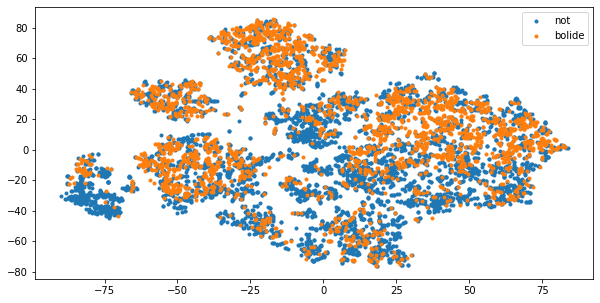

In [9]:
# use tSNE to plot hand coded train features after PCA dimensionality reduction in 2D
tsne = TSNE(n_components=2, random_state=42)
# rescale train PCA data so tSNE can treat dimensions with equal importance
tsne_X = tsne.fit_transform(scaler.fit_transform(X_train))
# plot tSNE of rescaled train PCA data
tsne_plot_x = tsne_X[:, 0]
tsne_plot_y = tsne_X[:, 1]
check_x_0 = tsne_plot_x[y_train == 0]
check_y_0 = tsne_plot_y[y_train == 0]
check_x_1 = tsne_plot_x[y_train == 1]
check_y_1 = tsne_plot_y[y_train == 1]
plt.plot(check_x_0, check_y_0, ".", label = 'not')
plt.plot(check_x_1, check_y_1, ".", label = 'bolide')
_ = plt.legend()

In [7]:
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’} 
# init and fit rbf svc model to train PCA data
rbf_clf = svm.SVC(kernel='rbf', random_state=42)
rbf_clf.fit(X_train, y_train)
# print validation scores and classification metrics
rbf_validation_score = rbf_clf.score(X_val, y_val)
rbf_validation_score

0.7812002124269782

In [8]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, random_state=42) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8080229226361032


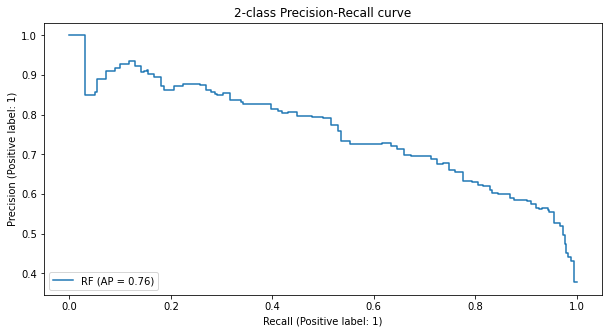

In [10]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="RF"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")